In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [5]:
df_month = pd.read_csv("kendall_corr.csv")
df_month

,November_7,May_6,April_7,October,August_3,December_2,November_3,January_2,August_4,May_3,...,February_6,March,August_6,July_2,November_4,April_2,July_4,November_2,April_4,November_5
0,-0.414703,0.426002,0.133591,-0.338700,0.577440,-0.233301,0.827789,0.605051,0.400172,0.077669,...,-0.116549,0.100928,0.433257,-0.217487,-0.219897,0.874274,0.290080,0.874171,0.581296,-0.360138
1,-0.414703,0.343893,0.146146,-0.338700,0.577440,-0.233301,0.827789,0.871469,0.400172,-0.121634,...,-0.090999,-0.419456,0.433257,-0.217487,-0.219897,0.353397,0.290080,0.874171,0.509800,-0.360138
2,0.119779,0.197382,0.100033,0.326479,0.806378,-0.675635,0.192062,0.415266,0.329216,0.163761,...,-0.241412,0.000503,0.089125,-0.382944,-0.316864,-0.016249,0.094743,1.159349,0.570283,-0.147265
3,-0.082401,-0.069665,0.006054,-0.092277,0.512310,-0.410518,0.484618,0.728203,0.386858,-0.783051,...,-0.126016,-0.806541,0.325284,-0.220251,-0.600256,-0.158023,0.614952,1.073638,0.622885,-0.291265
4,-1.015143,-0.835852,-0.124219,0.080417,0.211962,-0.230980,0.434227,0.737125,0.479675,0.205301,...,0.300532,-0.653793,0.362941,-0.446469,-0.273813,-0.072941,-0.008511,0.657452,0.407397,-0.161633
5,-0.818627,-0.070522,0.016689,0.084982,-0.290574,-0.454416,-0.226640,0.924936,0.593927,0.395723,...,-0.183712,-0.312365,0.075597,-0.426749,-0.552917,0.173635,0.273664,0.824648,0.525377,-0.774397
6,-1.069754,-0.573413,0.154757,0.017253,0.582391,-0.428709,0.448013,0.440763,0.573181,-0.203889,...,0.004519,-0.445309,-0.059758,-0.378581,-0.681090,0.162887,-0.199239,0.658131,0.351998,-0.054764
7,-0.768627,0.461886,-0.186963,-0.001182,0.066570,-0.485894,0.431479,0.788182,0.629099,0.029230,...,-0.125724,-0.092026,0.238688,-0.248362,0.022281,0.095082,0.547244,0.407619,0.552520,-0.171861
8,-0.137888,0.548707,0.084944,-0.158109,0.594337,-0.251346,0.661389,0.452983,0.526192,-0.202415,...,-0.327576,0.255984,-0.054053,-0.229343,-0.352506,0.075063,-0.339680,0.673057,0.209464,0.079556
9,-0.548753,-0.522139,0.120713,-0.083500,0.498273,-0.357940,0.235838,0.267330,0.553013,-0.253772,...,-0.400550,-0.248735,0.038578,-0.245324,-0.004226,0.179827,0.105686,0.289282,0.489990,-0.586774


In [6]:
df_month.columns

Index(['November_7', 'May_6', 'April_7', 'October', 'August_3', 'December_2',
       'November_3', 'January_2', 'August_4', 'May_3', 'April_9', 'July',
       'May_8', 'March_3', 'May_7', 'September', 'July_7', 'May', 'November_6',
       'July_5', 'August_8', 'May_4', 'July_6', 'August_7', 'May_2', 'March_2',
       'April_6', 'April_3', 'June_5', 'June_4', 'May_5', 'October_2',
       'July_8', 'April_8', 'April_5', 'June_2', 'August_2', 'February_4',
       'October_3', 'April', 'February_3', 'October_5', 'July_3', 'February',
       'November', 'November_8', 'January', 'February_5', 'December', 'June',
       'October_4', 'August_5', 'June_3', 'August', 'February_2', 'February_6',
       'March', 'August_6', 'July_2', 'November_4', 'April_2', 'July_4',
       'November_2', 'April_4', 'November_5'],
      dtype='object')

In [7]:
df_month.iloc[:42, :15]

,November_7,May_6,April_7,October,August_3,December_2,November_3,January_2,August_4,May_3,April_9,July,May_8,March_3,May_7
0,-0.414703,0.426002,0.133591,-0.338700,0.577440,-0.233301,0.827789,0.605051,0.400172,0.077669,-0.050333,-0.425964,-0.233783,0.422374,1.403130
1,-0.414703,0.343893,0.146146,-0.338700,0.577440,-0.233301,0.827789,0.871469,0.400172,-0.121634,-0.203332,-0.425964,0.085172,-0.020860,0.956998
2,0.119779,0.197382,0.100033,0.326479,0.806378,-0.675635,0.192062,0.415266,0.329216,0.163761,-0.147272,-0.163479,-0.037057,0.174689,0.903044
3,-0.082401,-0.069665,0.006054,-0.092277,0.512310,-0.410518,0.484618,0.728203,0.386858,-0.783051,-0.409264,-0.314234,-0.227975,0.221164,1.211135
4,-1.015143,-0.835852,-0.124219,0.080417,0.211962,-0.230980,0.434227,0.737125,0.479675,0.205301,-0.523008,-0.573076,-0.348377,0.381737,1.326634
5,-0.818627,-0.070522,0.016689,0.084982,-0.290574,-0.454416,-0.226640,0.924936,0.593927,0.395723,-0.524921,-0.615504,-0.054448,0.159859,1.009581
6,-1.069754,-0.573413,0.154757,0.017253,0.582391,-0.428709,0.448013,0.440763,0.573181,-0.203889,-0.221674,-0.362480,0.106052,-0.123122,1.005887
7,-0.768627,0.461886,-0.186963,-0.001182,0.066570,-0.485894,0.431479,0.788182,0.629099,0.029230,-0.464792,0.313722,-0.111373,0.236468,1.192781
8,-0.137888,0.548707,0.084944,-0.158109,0.594337,-0.251346,0.661389,0.452983,0.526192,-0.202415,-0.331353,-0.705730,0.277176,0.191826,0.938827
9,-0.548753,-0.522139,0.120713,-0.083500,0.498273,-0.357940,0.235838,0.267330,0.553013,-0.253772,-0.194850,-0.650601,-0.006919,0.276210,1.121086


In [9]:
df_month = df_month[["October","October_2","October_3","October_5","October_4"]]

In [11]:
scaler = StandardScaler()

In [19]:
x_train = df_month.iloc[:42, :]
x_train = scaler.fit_transform(x_train)
x_train

array([[-1.05186079,  1.25203813, -0.96116437,  0.03155232, -0.22290102],
       [-1.05186079,  1.25203813, -0.96116437,  0.03155232, -0.22290102],
       [ 1.63739144,  1.08380348,  0.57557406,  0.92662289, -1.22177744],
       [-0.05559605,  0.87312862,  1.28521868, -0.10544734,  0.59313488],
       [ 0.64258924,  0.06249414, -0.26623335,  0.25437819, -0.9301061 ],
       [ 0.661045  ,  0.629904  ,  1.23076737,  0.16065408,  0.65774068],
       [ 0.38722039,  0.40214641,  0.72311734,  1.08142032, -1.31253815],
       [ 0.31269186,  0.76785608,  0.91074871,  0.8750833 , -0.17385909],
       [-0.32174869,  0.32885986,  0.85280852,  0.09953762,  1.70803792],
       [-0.02011184, -0.76477371,  0.66144589,  0.05026094,  0.39043813],
       [-1.45252985,  1.55984989,  0.10144248, -0.86831956, -1.00803015],
       [-2.24300564,  1.23291766,  0.15683211, -3.18083258,  1.67191982],
       [ 0.94963332, -0.72406529,  1.37271894,  1.63241674, -0.4988997 ],
       [-1.47813946,  0.01251995, -0.4

In [13]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [20]:
x_test = df_month.iloc[43:, :]
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.30390221,  0.08287493, -0.85857159,  0.09880177, -1.74670305],
       [ 0.64981022,  1.06130862, -0.86250552,  0.84288133,  0.11127482],
       [ 0.54646797, -0.05819245,  1.71197261, -0.38758086, -1.61109874],
       [-0.61516424, -1.45741264,  0.51848481,  0.56291672,  0.69886657],
       [-0.37770529, -0.71955572,  0.75913771, -1.16685561,  0.33963592],
       [-1.96525964,  2.14795778, -0.0021486 , -1.16304396,  0.22671661],
       [ 0.88347219,  0.16028023, -0.23524075, -0.33872337,  0.33690746],
       [ 0.18218449, -0.18068259,  0.51668591,  1.48402938,  0.70449387],
       [ 1.06435783,  1.09982842, -0.83487292,  1.60953286,  0.29047525],
       [ 1.05092543, -0.87906903,  0.41283372,  1.78233857, -1.82959423],
       [ 0.30931472,  0.15367671, -1.52664287, -0.86476802,  1.11641793],
       [-1.5562085 ,  0.8755869 , -1.65893911, -0.48991788,  0.66071392],
       [ 0.64546179, -1.85625302,  1.62991314,  0.59417202, -0.64722654],
       [-1.86124306,  0.70858431, -0.2

In [21]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [22]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [24]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 26}
Best Score: -0.17103145692072408
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 1}
Best Score: -0.17977746040899567
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 16}
Best Score: 0.02529865038055773
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 23}
Best Score: -0.08622703365393736
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 6}
Best Score: -0.2618195419261892


In [27]:
y_pred_list

[array([ 0.02660751,  0.06336481, -0.24103643, -0.29793565, -0.13776628,
         0.11328242,  0.09136434, -0.23506199, -0.07411892, -0.46605287,
         0.41033348,  0.47699882, -0.50569112,  0.09693297, -0.11058765,
        -0.09237897]),
 array([ 0.19333333,  0.226     , -0.66125   ,  0.51333333, -0.66125   ,
         0.07      , -0.66125   , -0.66125   ,  0.226     , -0.66125   ,
         0.19333333,  0.66      , -0.66125   ,  0.07      , -0.66125   ,
        -0.66125   ]),
 array([-0.01241535, -0.14637392, -0.23164715, -0.3096404 , -0.11370815,
         0.12830833,  0.12830833, -0.3883904 , -0.19908877, -0.44110524,
         0.2677728 ,  0.2677728 , -0.5063294 ,  0.12830833, -0.11370815,
        -0.16642299]),
 array([ 0.06930334,  0.23449814, -0.16935475, -0.32859404, -0.23358552,
         0.16687365,  0.27755133, -0.23555938,  0.11942981, -0.60595537,
         0.56947239,  0.49029903, -0.6273974 ,  0.11019942, -0.20598382,
        -0.09988159]),
 array([ 0.01276965,  0.01276965

In [28]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [29]:
correlation_list

[0.18209708150513265,
 0.22725469564080403,
 0.13457344838938054,
 0.15465197181303947,
 -0.07919338683313316]

In [30]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/kendall/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/kendall/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/kendall/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+vwind Predicted vs Actual 15p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/kendall/comparison plots/bagging_regressor


# Random Forest

In [31]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [32]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 26}
Best Score: -0.17103145692072408
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 1}
Best Score: -0.17977746040899567
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 16}
Best Score: 0.02529865038055773
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 23}
Best Score: -0.08622703365393736
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 6}
Best Score: -0.2618195419261892


In [33]:
y_pred_list_rf

[array([ 0.02660751,  0.06336481, -0.24103643, -0.29793565, -0.13776628,
         0.11328242,  0.09136434, -0.23506199, -0.07411892, -0.46605287,
         0.41033348,  0.47699882, -0.50569112,  0.09693297, -0.11058765,
        -0.09237897]),
 array([ 0.19333333,  0.226     , -0.66125   ,  0.51333333, -0.66125   ,
         0.07      , -0.66125   , -0.66125   ,  0.226     , -0.66125   ,
         0.19333333,  0.66      , -0.66125   ,  0.07      , -0.66125   ,
        -0.66125   ]),
 array([-0.01241535, -0.14637392, -0.23164715, -0.3096404 , -0.11370815,
         0.12830833,  0.12830833, -0.3883904 , -0.19908877, -0.44110524,
         0.2677728 ,  0.2677728 , -0.5063294 ,  0.12830833, -0.11370815,
        -0.16642299]),
 array([ 0.06930334,  0.23449814, -0.16935475, -0.32859404, -0.23358552,
         0.16687365,  0.27755133, -0.23555938,  0.11942981, -0.60595537,
         0.56947239,  0.49029903, -0.6273974 ,  0.11019942, -0.20598382,
        -0.09988159]),
 array([ 0.01276965,  0.01276965

In [34]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [35]:
correlation_list_rf

[0.18209708150513265,
 0.22725469564080403,
 0.13457344838938054,
 0.15465197181303947,
 -0.07919338683313316]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/kendall/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.axhline(y=0, color='black', linewidth=2)
    plt.axvline(x=0, color='black', linewidth=2)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'15_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/kendall/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/kendall/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+vwind Predicted vs Actual 15p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/kendall/comparison plots/randomforest


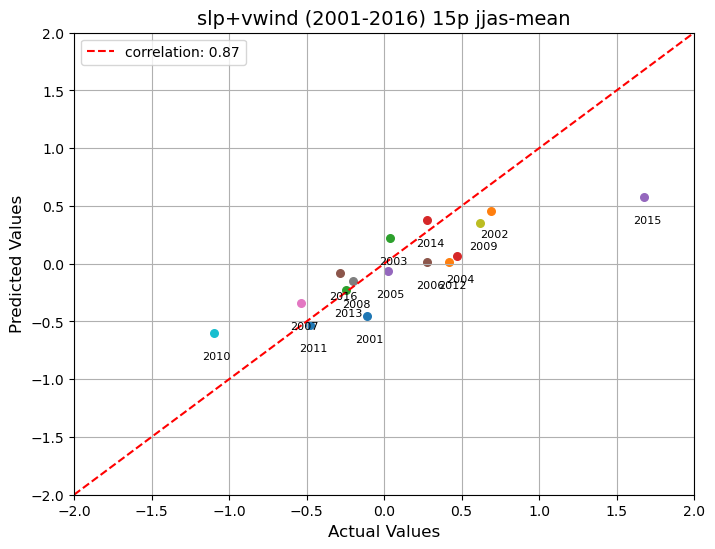

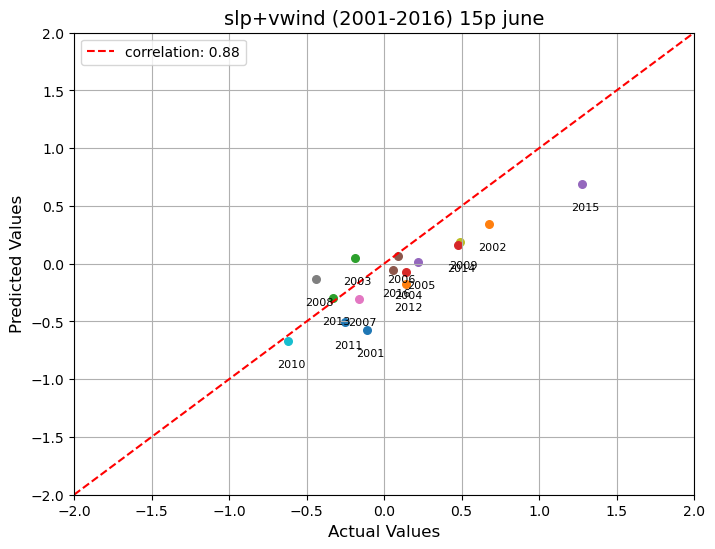

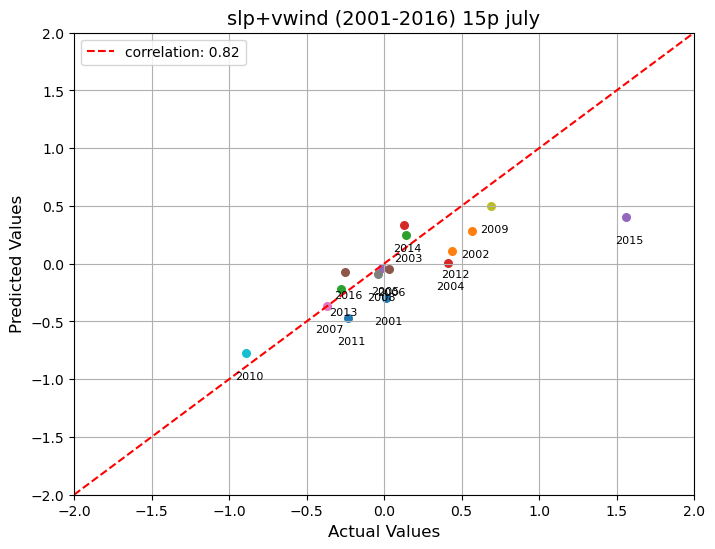

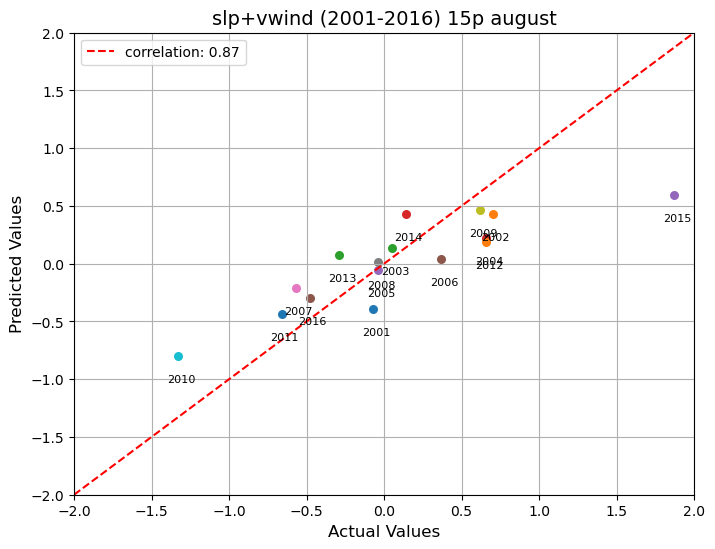

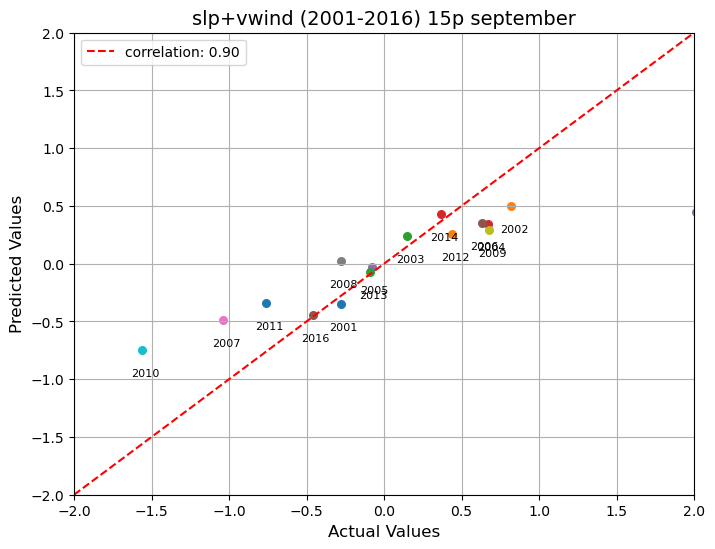

In [152]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=30)#marker='D'
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -19), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    #plt.axhline(y=0, color='black', linewidth=1)
    #plt.axvline(x=0, color='black', linewidth=1)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show

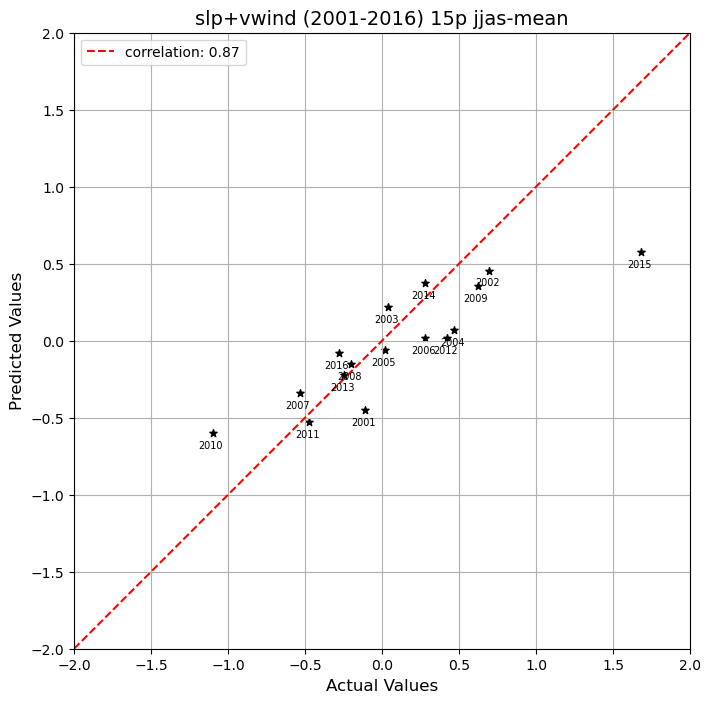

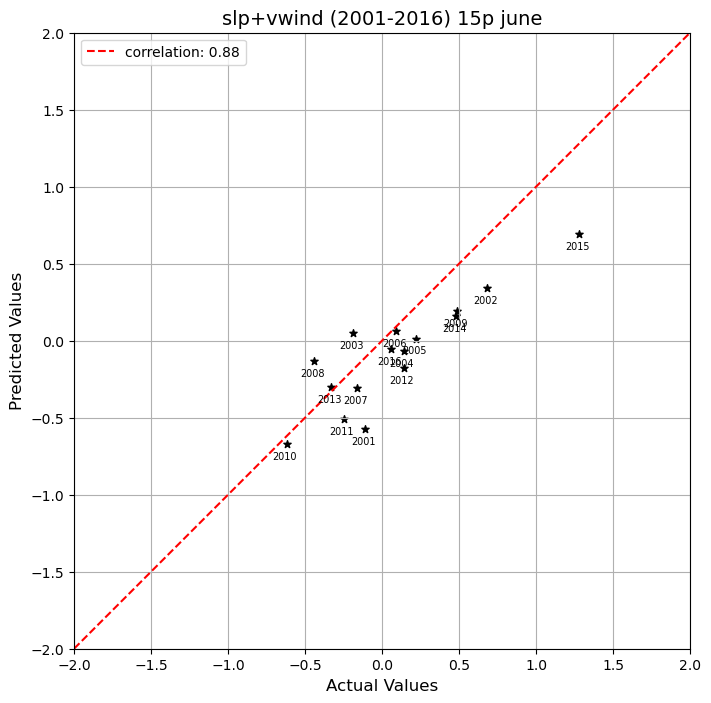

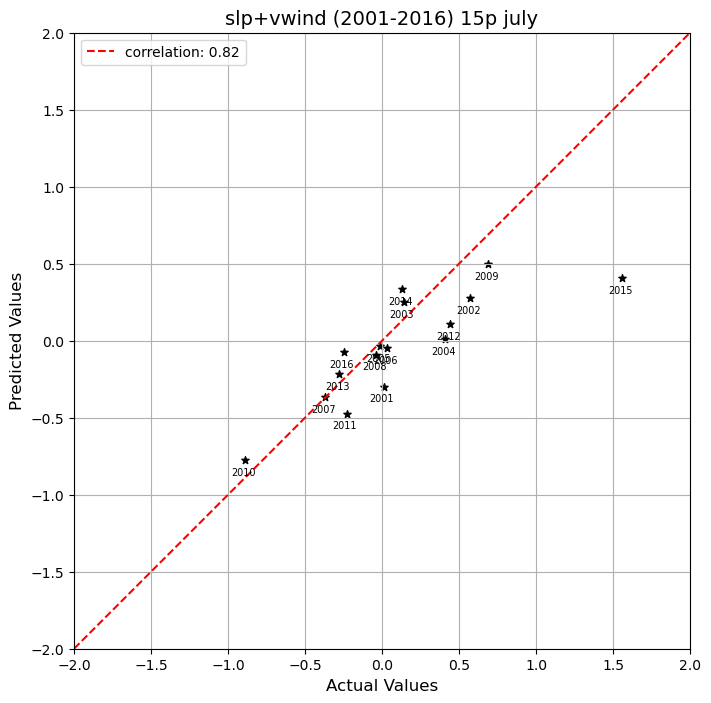

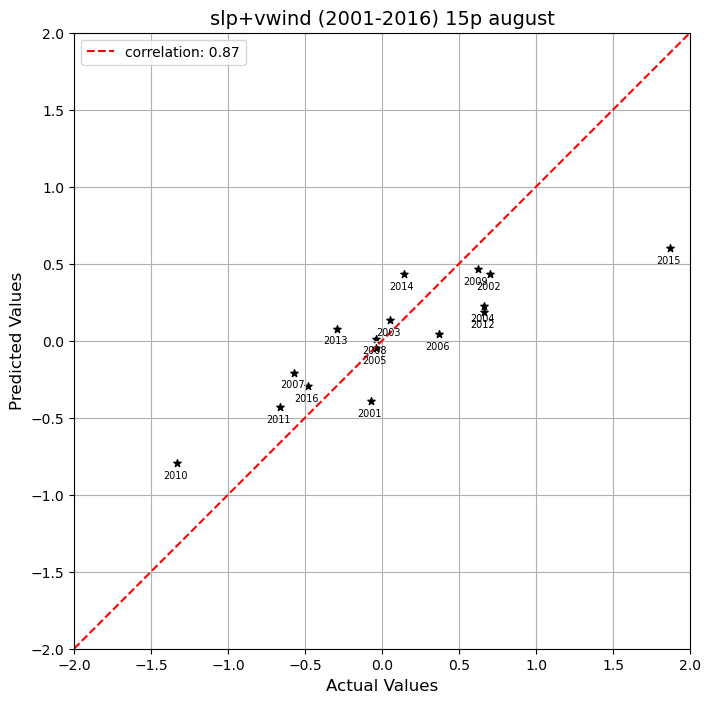

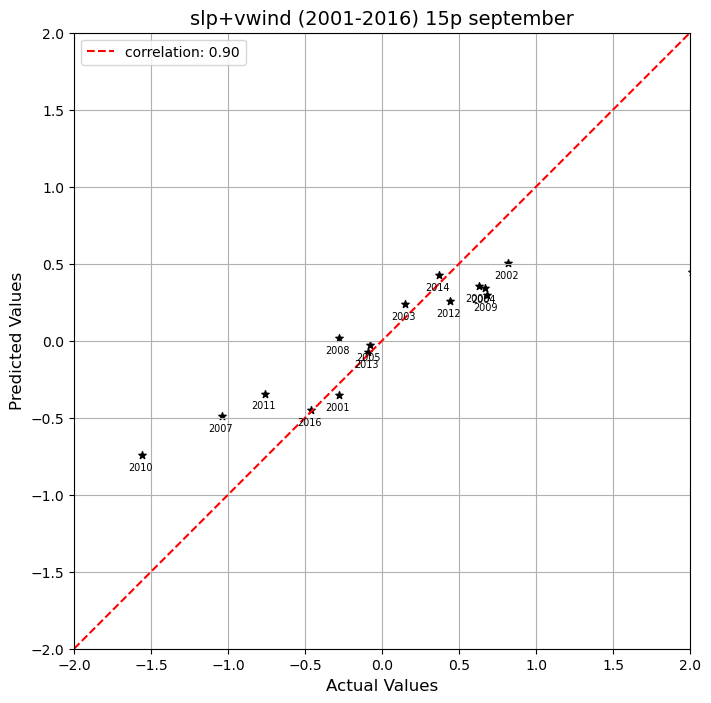

In [55]:
for i in range(5):
    actual_values = y_test[i]  # Replace with your actual values
    predicted_values = y_pred_list_rf[i]  # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(10, 8))  # Increased figure size

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=30, marker='*',color='black')  # Increased marker size
        plt.annotate(f"{year}", (actual, predicted), xytext=(-10, -11), textcoords='offset points', fontsize=7)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

    plt.gca().set_aspect('equal')  # Set aspect ratio to be equal
    plt.grid(True)
    plt.legend()
    plt.show()


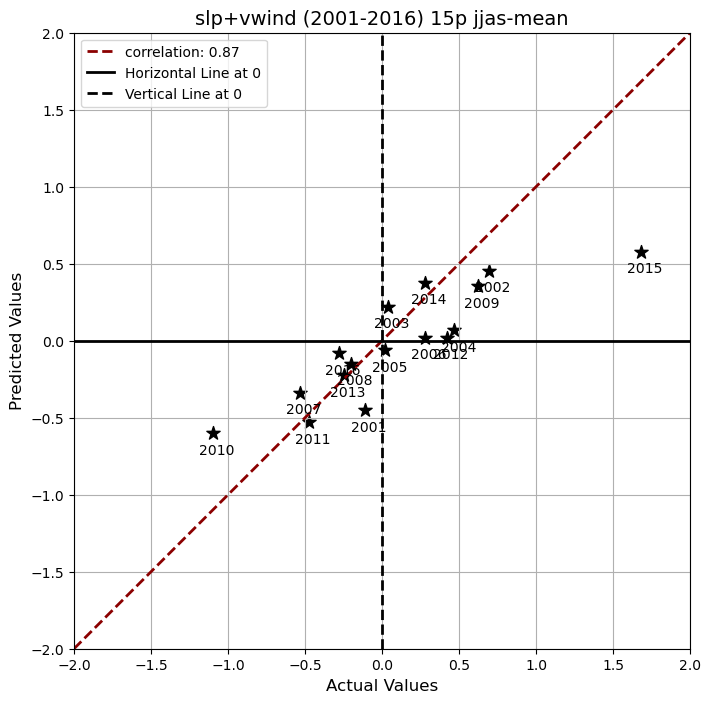

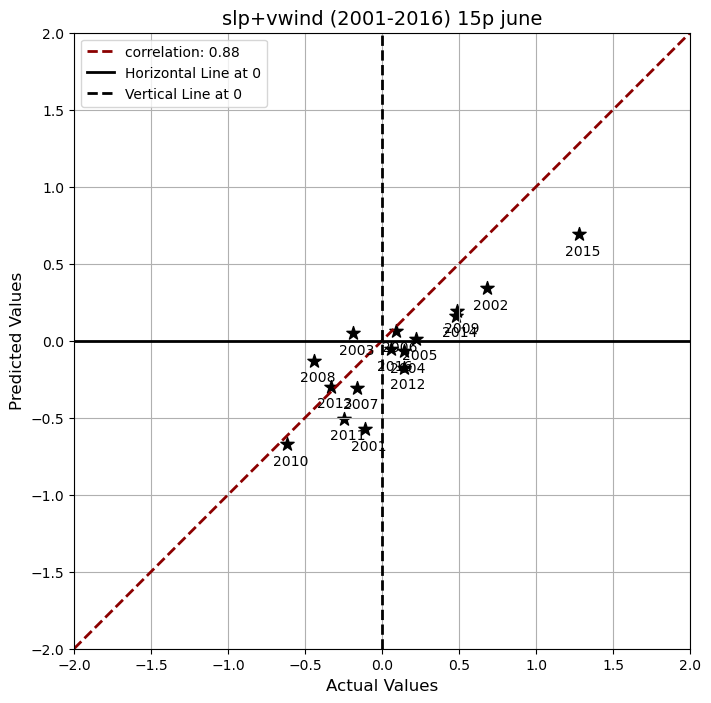

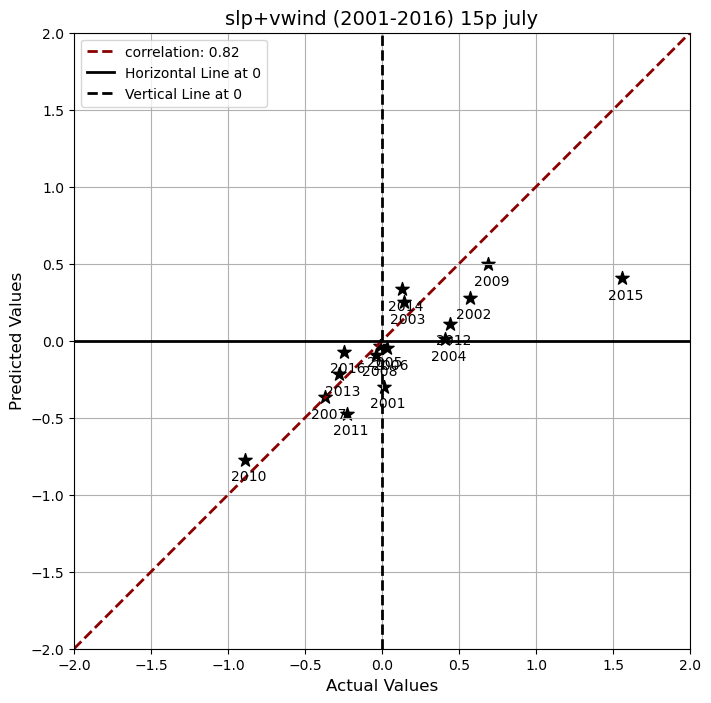

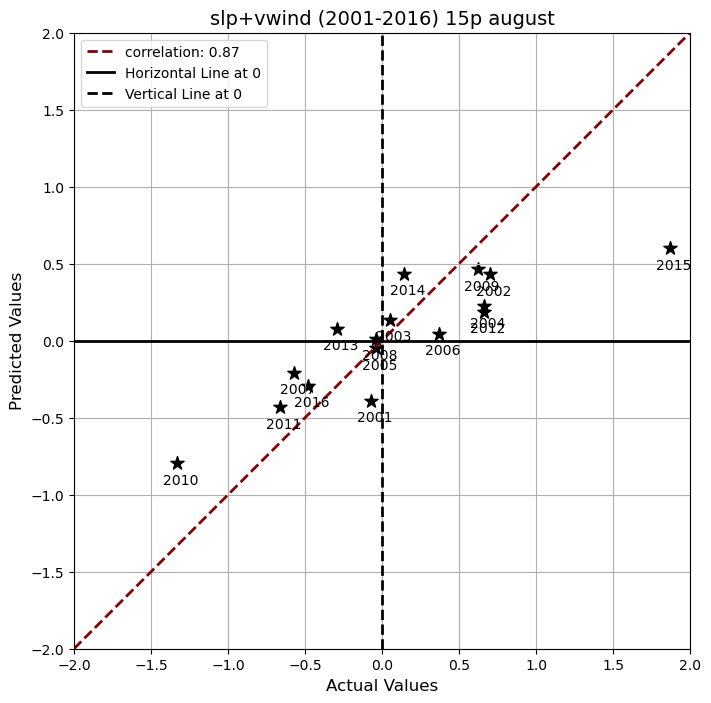

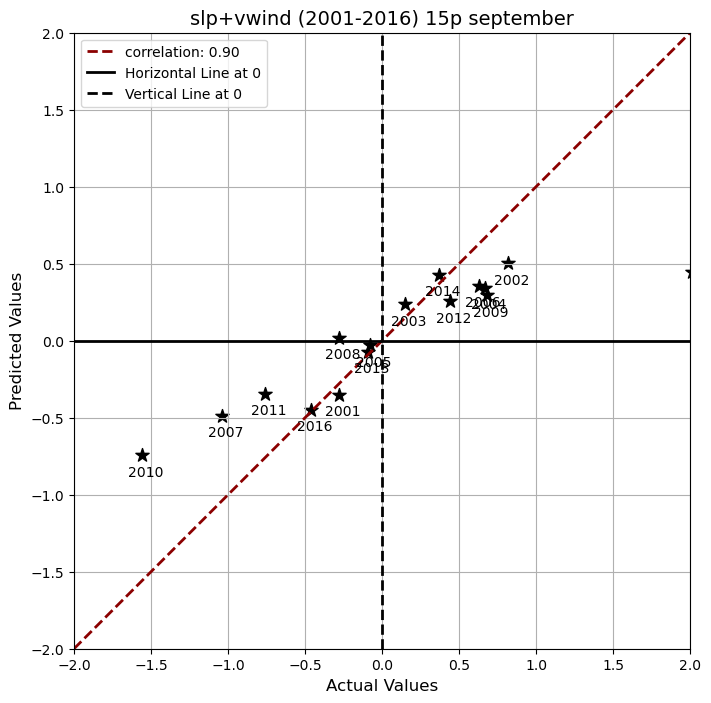

In [64]:
for i in range(5):
    actual_values = y_test[i]  # Replace with your actual values
    predicted_values = y_pred_list_rf[i]  # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(10, 8))  # Increased figure size

    # Create scatter plot with star markers and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=100, marker='*', color='black')  # Use star markers in black
        plt.annotate(f"{year}", (actual, predicted), xytext=(-10, -15), textcoords='offset points', fontsize=10)

    # Add diagonal line with darker color
    plt.plot([-2, 2], [-2, 2], color='darkred', linestyle='--', linewidth=2, label=f'correlation: {correlation_list[i]:.2f}')
    plt.axhline(y=0, color='black', linewidth=2)
    plt.axvline(x=0, color='black', linewidth=2)

    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

    plt.gca().set_aspect('equal')  # Set aspect ratio to be equal
    plt.grid(True)
    plt.legend()
    plt.show()


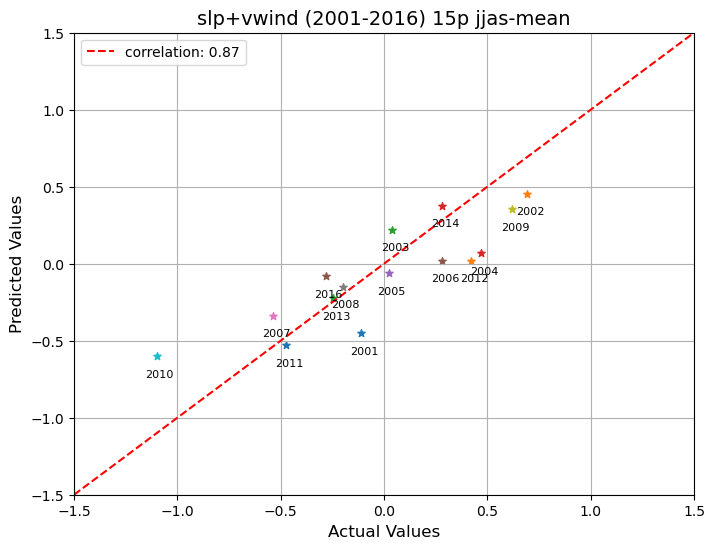

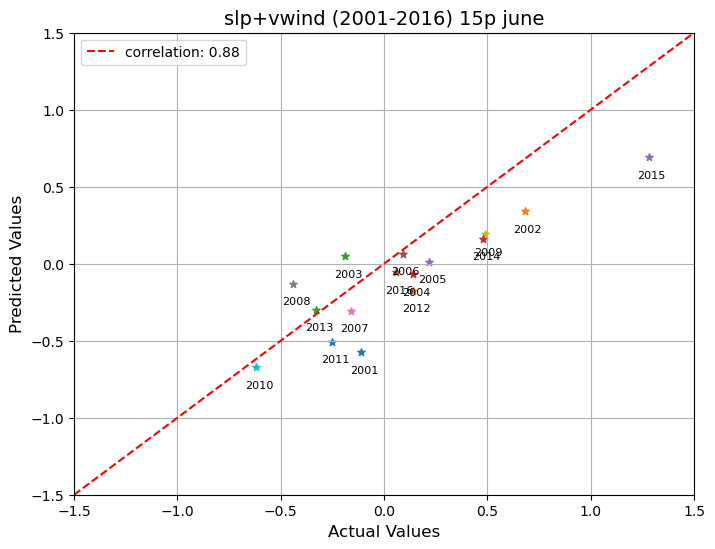

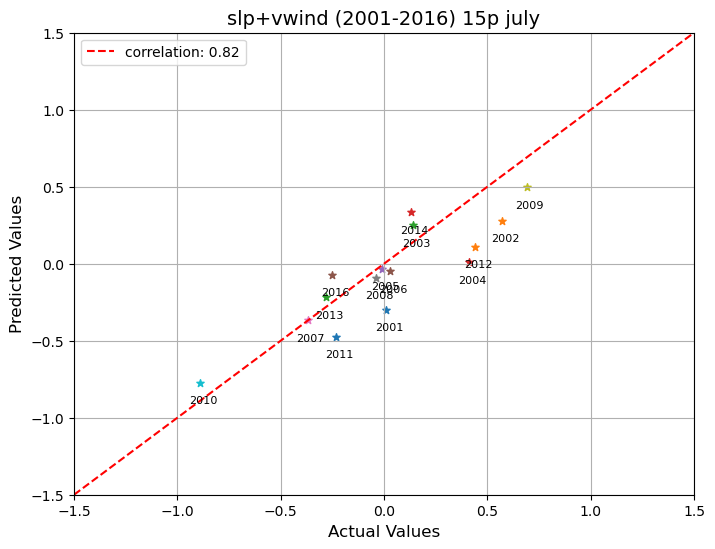

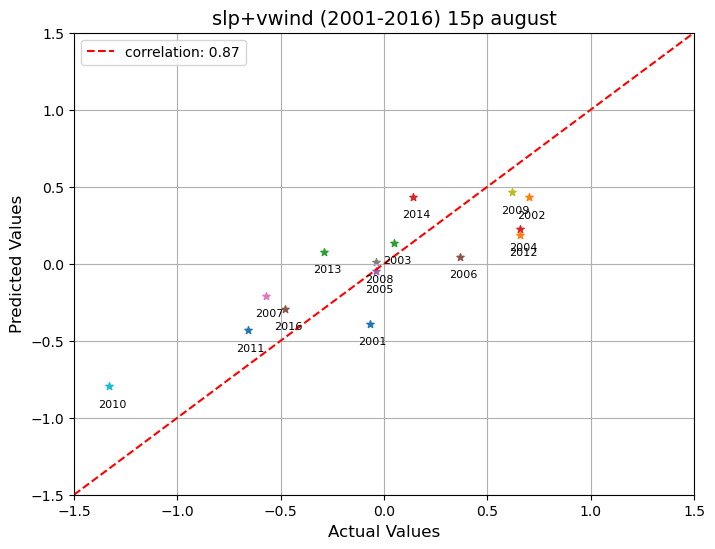

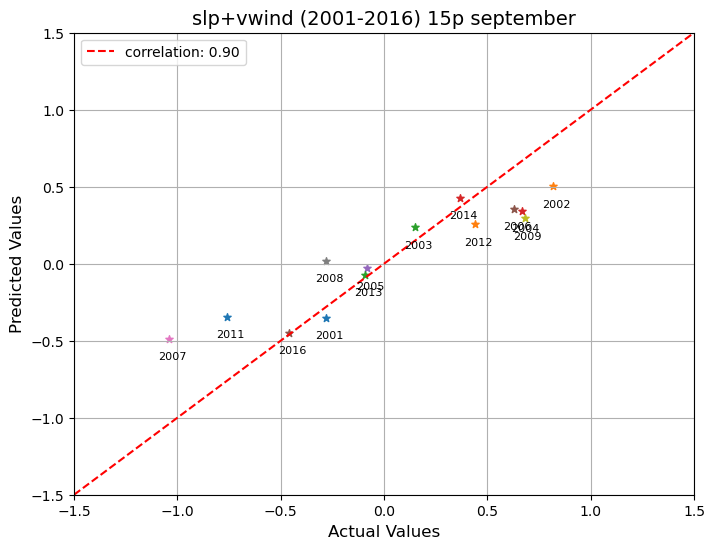

In [150]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=30,marker='*')
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-1.5, 1.5], [-1.5, 1.5], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-1.5, 1.5)  # Set limits from -2 to 2
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()
    plt.show

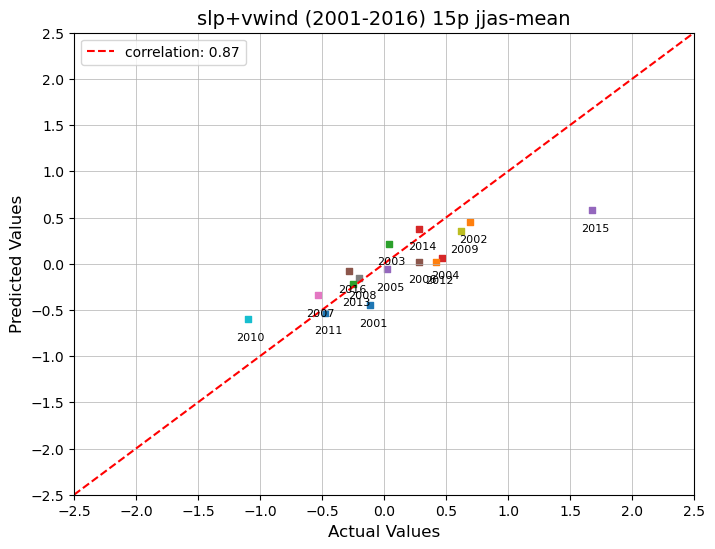

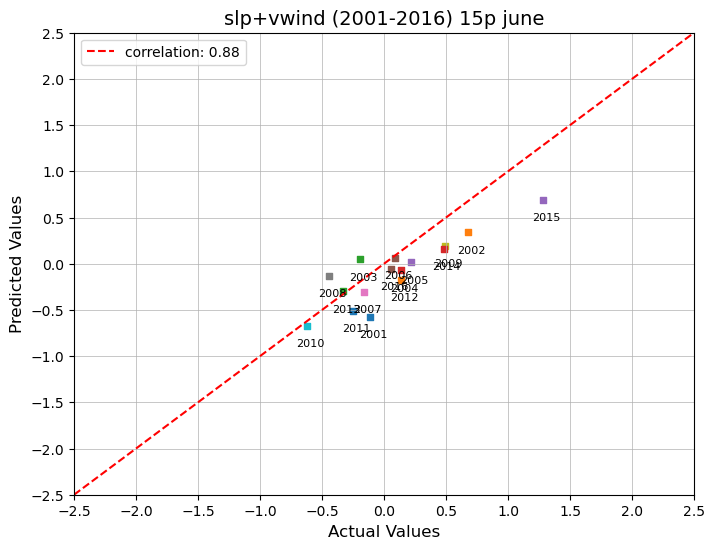

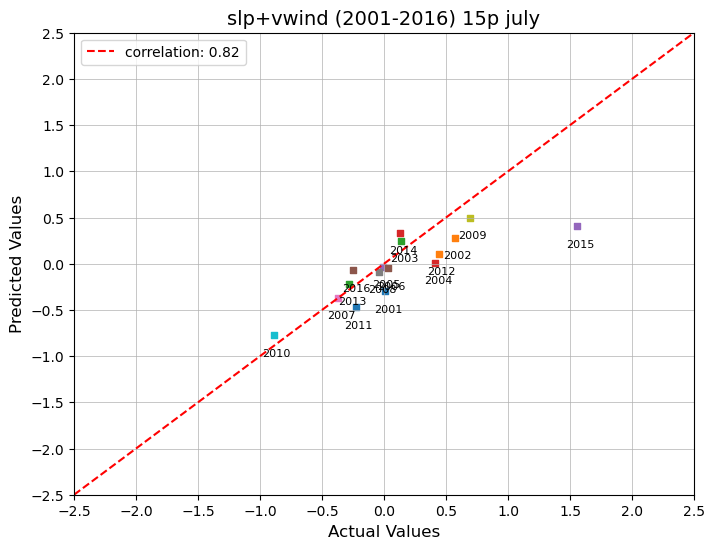

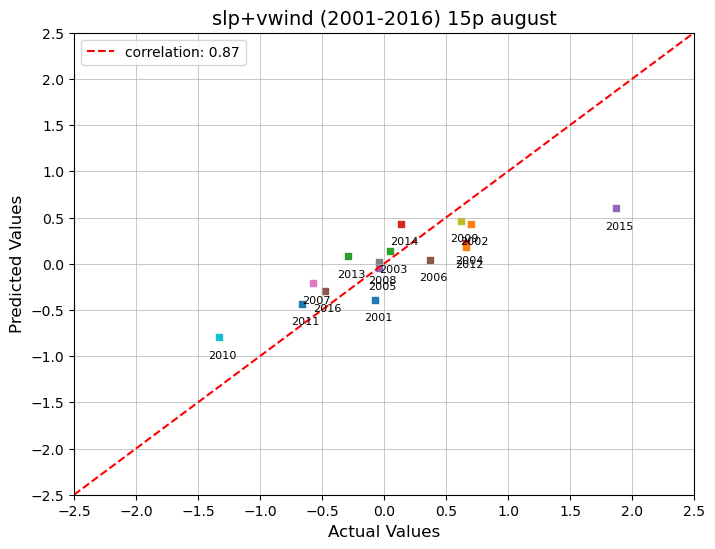

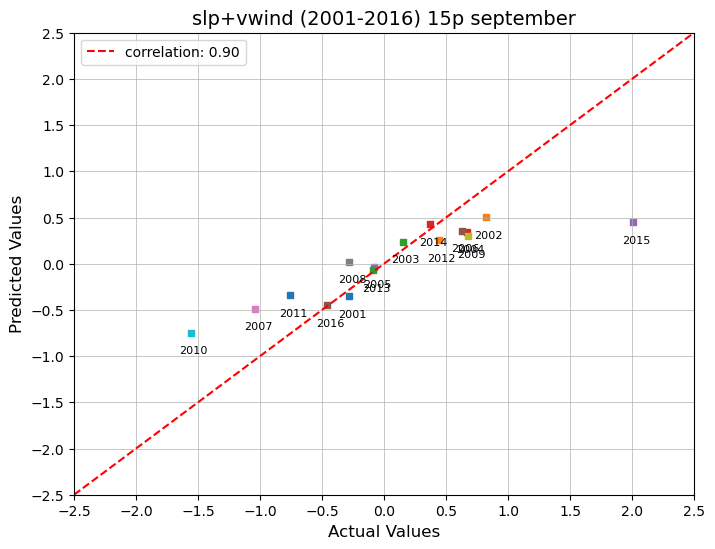

In [155]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=20,marker='s')
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2.5, 2.5], [-2.5, 2.5], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2.5, 2.5)  # Set limits from -2 to 2
    plt.ylim(-2.5, 2.5)
    plt.xticks(np.arange(-2.5, 2.6, 0.5))  # Tick marks at every 0.5 interval
    plt.yticks(np.arange(-2.5, 2.6, 0.5))
    #plt.minorticks_on()  # Enable minor ticks between major ticks
    plt.grid(True, which='both', axis='both',  linewidth=0.5)
    plt.legend()
    plt.show

In [116]:
pred = pd.read_csv("paper_predic.csv")

In [117]:
pred

,JJAS_MEAN,JUNE,JULY,AUGUST,SEPTEMBER
0,-0.317204,-0.253406,-0.026882,-0.068966,-0.520970
1,0.564516,0.433243,0.134409,0.090186,0.593054
2,0.010753,-0.118529,0.139785,-0.238727,-0.219528
3,0.532258,0.138965,0.317204,1.151194,0.403014
4,0.134409,0.298365,-0.043011,0.063660,0.173657
5,-0.172043,0.110354,0.387097,0.344828,0.403014
6,-0.188172,-0.257493,-0.548387,-0.450928,-0.501311
7,-0.510753,-0.441417,-0.107527,-0.090186,-0.075360
8,0.129032,0.474114,0.150538,0.350133,0.520970
9,-1.048387,-0.081744,-0.752688,-0.328912,-0.671691


In [ ]:
for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+vwind Predicted vs Actual 15p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')

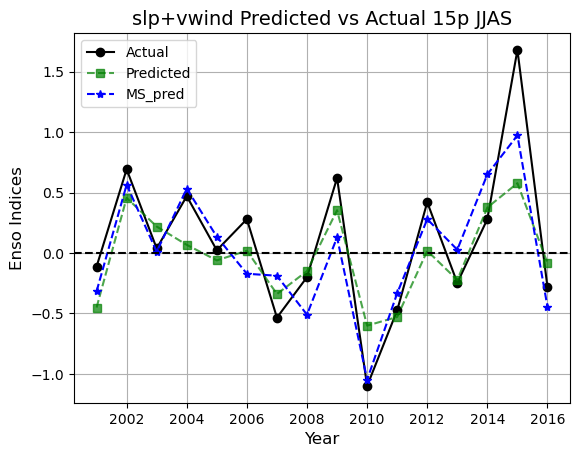

In [120]:
plt.plot(df['year'][43:], y_test[0], label='Actual', color='black', marker='o', linestyle='-')
plt.plot(df['year'][43:], y_pred_list_rf[0], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)
plt.plot(df['year'][43:], pred["JJAS_MEAN"], label='MS_pred', color='blue', marker='*', linestyle='--')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Enso Indices', fontsize=12)
plt.title(f'slp+vwind Predicted vs Actual 15p JJAS', fontsize=14)
plt.legend(loc='upper left')

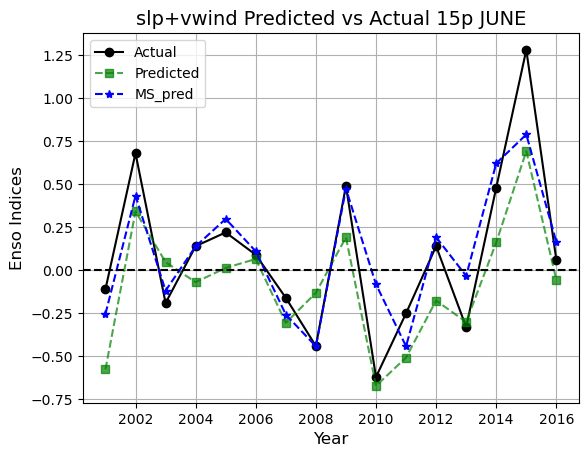

In [122]:
plt.plot(df['year'][43:], y_test[1], label='Actual', color='black', marker='o', linestyle='-')
plt.plot(df['year'][43:], y_pred_list_rf[1], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)
plt.plot(df['year'][43:], pred["JUNE"], label='MS_pred', color='blue', marker='*', linestyle='--')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Enso Indices', fontsize=12)
plt.title(f'slp+vwind Predicted vs Actual 15p JUNE', fontsize=14)
plt.legend(loc='upper left')

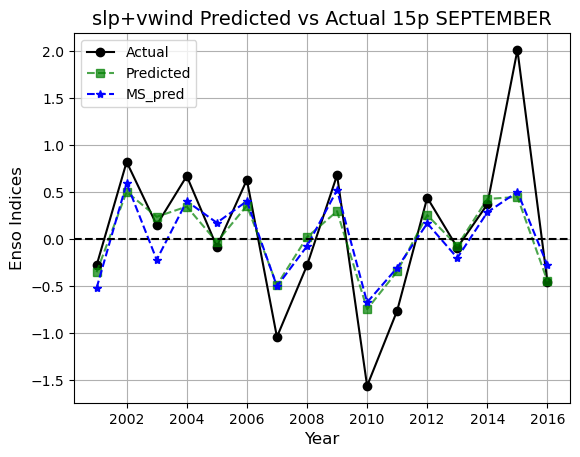

In [123]:
plt.plot(df['year'][43:], y_test[4], label='Actual', color='black', marker='o', linestyle='-')
plt.plot(df['year'][43:], y_pred_list_rf[4], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)
plt.plot(df['year'][43:], pred["SEPTEMBER"], label='MS_pred', color='blue', marker='*', linestyle='--')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Enso Indices', fontsize=12)
plt.title(f'slp+vwind Predicted vs Actual 15p SEPTEMBER', fontsize=14)
plt.legend(loc='upper left')